## import all the essential libraries for data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Loading the dataset

In [33]:
df = pd.read_csv(r'data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### viewing the summery statistics about the data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [35]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [36]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

#### from the above code output we can see that there are many columns that contains missing values and some features are in object data type where they should be in integer or float data type

### typecasting and performing data wrangling on object dtypes such as mileage_num, engine and max_power

In [37]:
df['mileage_num']=df['mileage'].str[0:4].astype(np.float64)

In [38]:
engine=df['engine'].str[0:4]
df['engine_num']=pd.to_numeric(engine, errors='coerce', downcast='float')
df['engine_num'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine_num, dtype: float32

In [39]:
df['max_power']=df['max_power'].str.extract('(\d*\.*\d+)').astype(np.float64)

### for the torque column i am seperating it into 2 columns such as torque_NM and torque_rpm so that the messy torque column can be used in the machine learning

In [40]:
df['torque_NM']=df['torque'].str.extract('(\d*\.*\d+)').astype(np.float64)
df['torque_NM'].head()

0    190.0
1    250.0
2     12.7
3     22.4
4     11.5
Name: torque_NM, dtype: float64

In [41]:
df['torque_rpm']=df['torque'].str.extract('(\d+rpm$|\d+[-]\d+rpm$|\d*,\d+[\(kgm@ rpm])',expand=False)\
.str.replace(pat='rpm|\(', repl='', regex=True)

In [42]:
df['torque_rpm'].head(10)

0         2000
1    1500-2500
2        2,700
3    1750-2750
4        4,500
5         4000
6        4,500
7         2500
8    1800-2400
9         2000
Name: torque_rpm, dtype: object

In [43]:
def convert(x):
    x=str(x)
    if '-' in x:
        a=[]
        for i in x.split('-'):
            a.append(float(i))
        return np.mean(a)
    elif ',' in x:
        return x.replace(',','')
    else:
        return x

In [44]:
df['torque_rpm']=pd.to_numeric(df['torque_rpm'].apply(convert),errors='coerce')

### other object type features in the dataframe are categorical features which we will encode using pandas get_dummies later on

In [45]:
df=df.drop(['mileage','engine','torque'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   max_power      7912 non-null   float64
 9   seats          7907 non-null   float64
 10  mileage_num    7907 non-null   float64
 11  engine_num     7907 non-null   float32
 12  torque_NM      7906 non-null   float64
 13  torque_rpm     7659 non-null   float64
dtypes: float32(1), float64(5), int64(3), object(5)
memory usage: 857.4+ KB


### lets save the current data into a new csv file named clean_df.csv and i am droping the name column because there are various names for cars so that is not going to help us in machine learning

In [46]:
df.name.value_counts()

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [47]:
names = df['name']

In [50]:
# df=pd.read_csv(r'clean_df.csv')
df = df.drop('name',axis=1)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,seats,mileage_num,engine_num,torque_NM,torque_rpm
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,5.0,23.4,1248.0,190.0,2000.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,5.0,21.1,1498.0,250.0,2000.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,78.00,5.0,17.7,1497.0,12.7,2700.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,90.00,5.0,23.0,1396.0,22.4,2250.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.20,5.0,16.1,1298.0,11.5,4500.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   max_power      7912 non-null   float64
 8   seats          7907 non-null   float64
 9   mileage_num    7907 non-null   float64
 10  engine_num     7907 non-null   float32
 11  torque_NM      7906 non-null   float64
 12  torque_rpm     7659 non-null   float64
dtypes: float32(1), float64(5), int64(3), object(4)
memory usage: 793.9+ KB


In [52]:
df.describe()

,year,selling_price,km_driven,max_power,seats,mileage_num,engine_num,torque_NM,torque_rpm
count,8128.000000,8.128000e+03,8.128000e+03,7912.000000,7907.000000,7907.000000,7907.00000,7906.000000,7659.000000
mean,2013.804011,6.382718e+05,6.981951e+04,91.517919,5.416719,19.396724,1458.62500,168.294141,2894.469056
std,4.044249,8.062534e+05,5.655055e+04,35.822499,0.959588,4.035456,503.91629,97.313384,997.436695
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,2.000000,0.000000,624.00000,4.800000,500.000000
25%,2011.000000,2.549990e+05,3.500000e+04,68.050000,5.000000,16.700000,1197.00000,101.000000,2000.000000
50%,2015.000000,4.500000e+05,6.000000e+04,82.000000,5.000000,19.300000,1248.00000,154.900000,2500.000000
75%,2017.000000,6.750000e+05,9.800000e+04,102.000000,5.000000,22.300000,1582.00000,202.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,400.000000,14.000000,42.000000,3604.00000,789.000000,21800.000000


### however, before replacing NA values lets see the summery stats once again and from it i discovered that there are some missing info's 
1. the minimum value of max_power is 0 which can introduce some bias later in our model
2. same goes for mileage_num
so we should replace those minimum values of the respestive columns with NA values

In [53]:
# filling missing values
df['max_power'].replace(df['max_power'].min(),np.nan,inplace=True)

In [54]:
df['mileage_num'].replace(df['mileage_num'].min(),np.nan,inplace=True)

In [55]:
df.describe()

,year,selling_price,km_driven,max_power,seats,mileage_num,engine_num,torque_NM,torque_rpm
count,8128.000000,8.128000e+03,8.128000e+03,7906.000000,7907.000000,7890.000000,7907.00000,7906.000000,7659.000000
mean,2013.804011,6.382718e+05,6.981951e+04,91.587374,5.416719,19.438517,1458.62500,168.294141,2894.469056
std,4.044249,8.062534e+05,5.655055e+04,35.747216,0.959588,3.937958,503.91629,97.313384,997.436695
min,1983.000000,2.999900e+04,1.000000e+00,32.800000,2.000000,9.000000,624.00000,4.800000,500.000000
25%,2011.000000,2.549990e+05,3.500000e+04,68.050000,5.000000,16.700000,1197.00000,101.000000,2000.000000
50%,2015.000000,4.500000e+05,6.000000e+04,82.000000,5.000000,19.300000,1248.00000,154.900000,2500.000000
75%,2017.000000,6.750000e+05,9.800000e+04,102.000000,5.000000,22.300000,1582.00000,202.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,400.000000,14.000000,42.000000,3604.00000,789.000000,21800.000000


## filling NANs

In [56]:
df.isna().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
max_power        222
seats            221
mileage_num      238
engine_num       221
torque_NM        222
torque_rpm       469
dtype: int64

### we can replace the missing values of the columns by their respective median values

In [57]:
df['max_power']=df['max_power'].replace(np.nan,df['max_power'].median())
df['seats']=df['seats'].replace(np.nan,df['seats'].median())
df['mileage_num']=df['mileage_num'].replace(np.nan,df['mileage_num'].median())
df['engine_num']=df['engine_num'].replace(np.nan,df['engine_num'].median())
df['torque_NM']=df['torque_NM'].replace(np.nan,df['torque_NM'].median())
df['torque_rpm']=df['torque_rpm'].replace(np.nan,df['torque_rpm'].median())

In [58]:
df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
max_power        0
seats            0
mileage_num      0
engine_num       0
torque_NM        0
torque_rpm       0
dtype: int64

### Now, the missing values are replaced lets see the correlation among the features using the seaborns heatmap and here i am using the default pearsons correlation coefficient

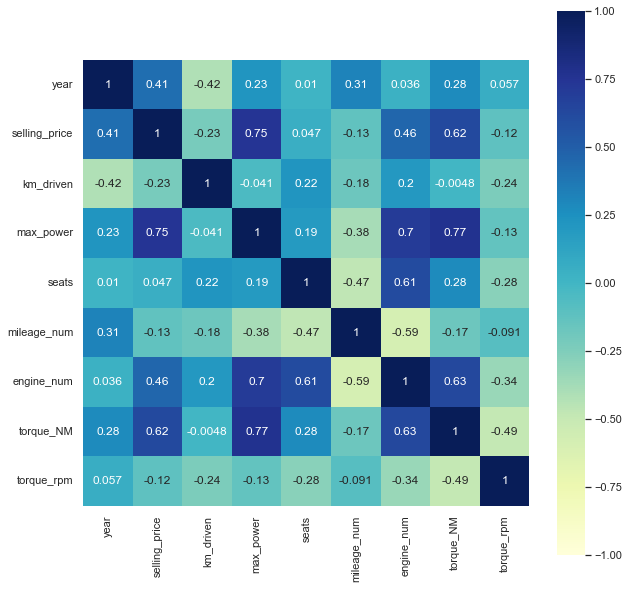

In [59]:
corr=df.corr()
# fig,ax = plt.subplots()
sns.set(rc={"figure.figsize":(10, 10)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1,
    square=True,
    annot=True,
    cmap="YlGnBu"
)

### from this map i can tell which feature is strongly related to which feature, selling price is strongly dependent upon max_power, torque_NM and engine which should be.

In [60]:
df1 = df.merge(names,left_index=True,right_index=True)
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,seats,mileage_num,engine_num,torque_NM,torque_rpm,name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,5.0,23.4,1248.0,190.0,2000.0,Maruti Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,5.0,21.1,1498.0,250.0,2000.0,Skoda Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,78.00,5.0,17.7,1497.0,12.7,2700.0,Honda City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,90.00,5.0,23.0,1396.0,22.4,2250.0,Hyundai i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.20,5.0,16.1,1298.0,11.5,4500.0,Maruti Swift VXI BSIII


<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

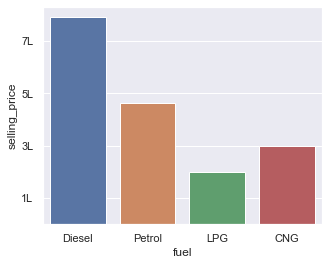

In [61]:
fig,ax=plt.subplots(figsize=(5,4))
yticks=[100000,300000,500000,700000,900000]
ytick_labels=['1L','3L','5L','7L','9L']
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)
sns.barplot(x='fuel',y='selling_price',data=df1,ci=None,ax=ax)

### the above figure tells that selling price of the average cars which runs on diesel is higher compared to other fuels runned cars.

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

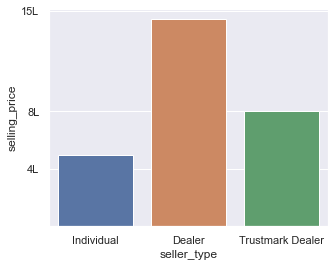

In [62]:
fig,ax=plt.subplots(figsize=(5,4))
ax.set_yticks([400000,800000,1500000])
ax.set_yticklabels(['4L','8L','15L'])
sns.barplot(x='seller_type',y='selling_price',data=df1,ci=None,ax=ax)

### this above figure tells that car dealers sells the cars at more higher than other type of sellers

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

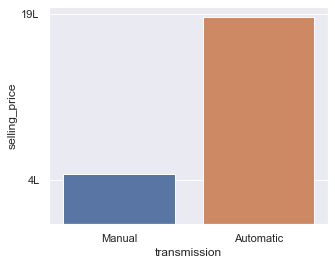

In [63]:
fig,ax=plt.subplots(figsize=(5,4))
ax.set_yticks([400000,1900000])
ax.set_yticklabels(['4L','19L'])
sns.barplot(x='transmission',y='selling_price',data=df1,ci=None,ax=ax)

### the above figure tells that automatic transmission cars are costly than manual cars, which can also be verified by the below code

In [64]:
df1.groupby('transmission')['selling_price'].mean()

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64

### And similarly the below figure tells that the average price of the cars which were sold as test drive cars are sold at a very higher price than the other owners

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

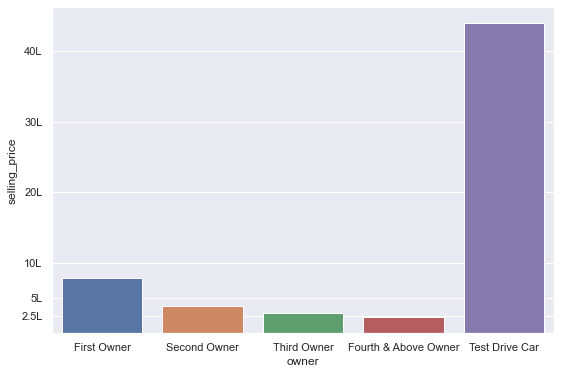

In [65]:
fig,ax=plt.subplots(figsize=(9,6))
ax.set_yticks([250000,500000,1000000,2000000,3000000,4000000])
ax.set_yticklabels(['2.5L','5L','10L','20L','30L','40L'])
sns.barplot(x='owner',y='selling_price',data=df1,ci=None,ax=ax)

### this below figure shows how over the years the price of the cars which runs on different fuels increased and i can see that today, diesel cars price is very much higher among the others

<AxesSubplot:xlabel='year', ylabel='selling_price'>

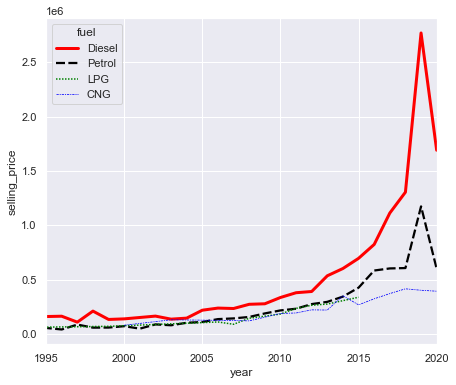

In [67]:
fig,ax=plt.subplots(figsize=(7,6))
ax.set_xlim(1995,2020)
sns.lineplot(x='year',
             y='selling_price',
             data=df1,
             ci=None,
             hue='fuel',
             palette=['red','black','green','blue'],
             style='fuel',
             size='fuel')

### this below figure tells the graph of selling prices over the years depending on the seller types, and i can see that dealer selled cars are very costly

<AxesSubplot:xlabel='year', ylabel='selling_price'>

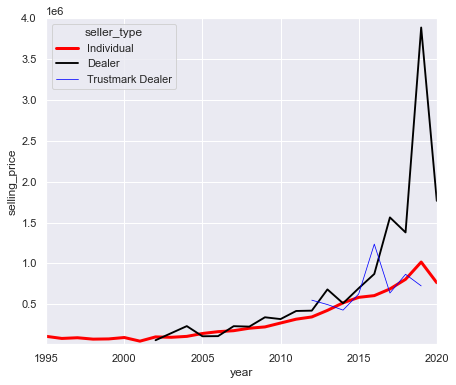

In [68]:
fig,ax=plt.subplots(figsize=(7,6))
ax.set_xlim(1995,2020)
ax.set_ylim(10000,4000000)
sns.lineplot(x='year',y='selling_price',data=df1,hue='seller_type',ci=None,palette=['red','black','blue'],size='seller_type')

### the autonatic transmission cars are very costly than manual transmission cars

<AxesSubplot:xlabel='year', ylabel='selling_price'>

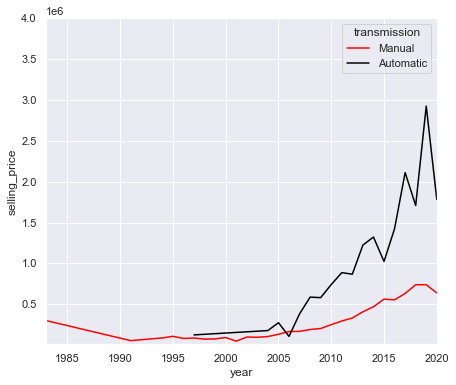

In [69]:
fig,ax=plt.subplots(figsize=(7,6))
ax.set_xlim(1983,2020)
ax.set_ylim(10000,4000000)
sns.lineplot(x='year',y='selling_price',data=df1,hue='transmission',ci=None,palette=['red','black'])

### And the first owners tend to sell their cars at more costs than the others (why should they sell it at a low price than if that owner would be the sencond owner?)

<AxesSubplot:xlabel='year', ylabel='selling_price'>

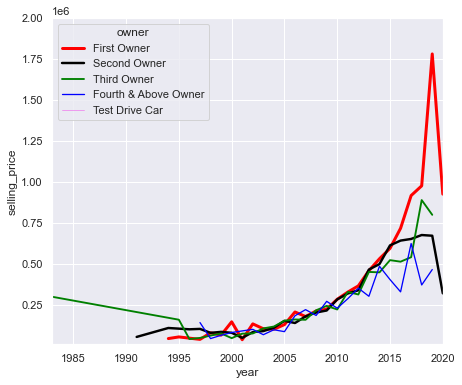

In [70]:
fig,ax=plt.subplots(figsize=(7,6))
ax.set_xlim(1983,2020)
ax.set_ylim(10000,2000000)
sns.lineplot(x='year',y='selling_price',data=df1,hue='owner',ci=None,lw=2,palette=['red','black','green','blue','violet'],size='owner')

### Previously we have seen the correlation between the selling_price and Km_driven which was -0.23, now lets visualize it with seaborn

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

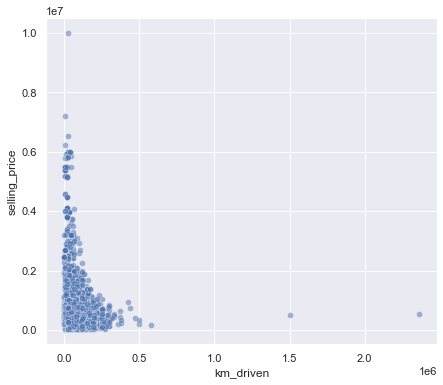

In [71]:
fig,ax=plt.subplots(figsize=(7,6))
sns.set_style('dark')
sns.scatterplot(x='km_driven',y='selling_price',data=df1,ax=ax,alpha=0.5)

### so this already tells us that as the car would be driven more and more the price will be less, which should be in the practical

### But lets explore the relation of the other features also using seaborn's pairplot

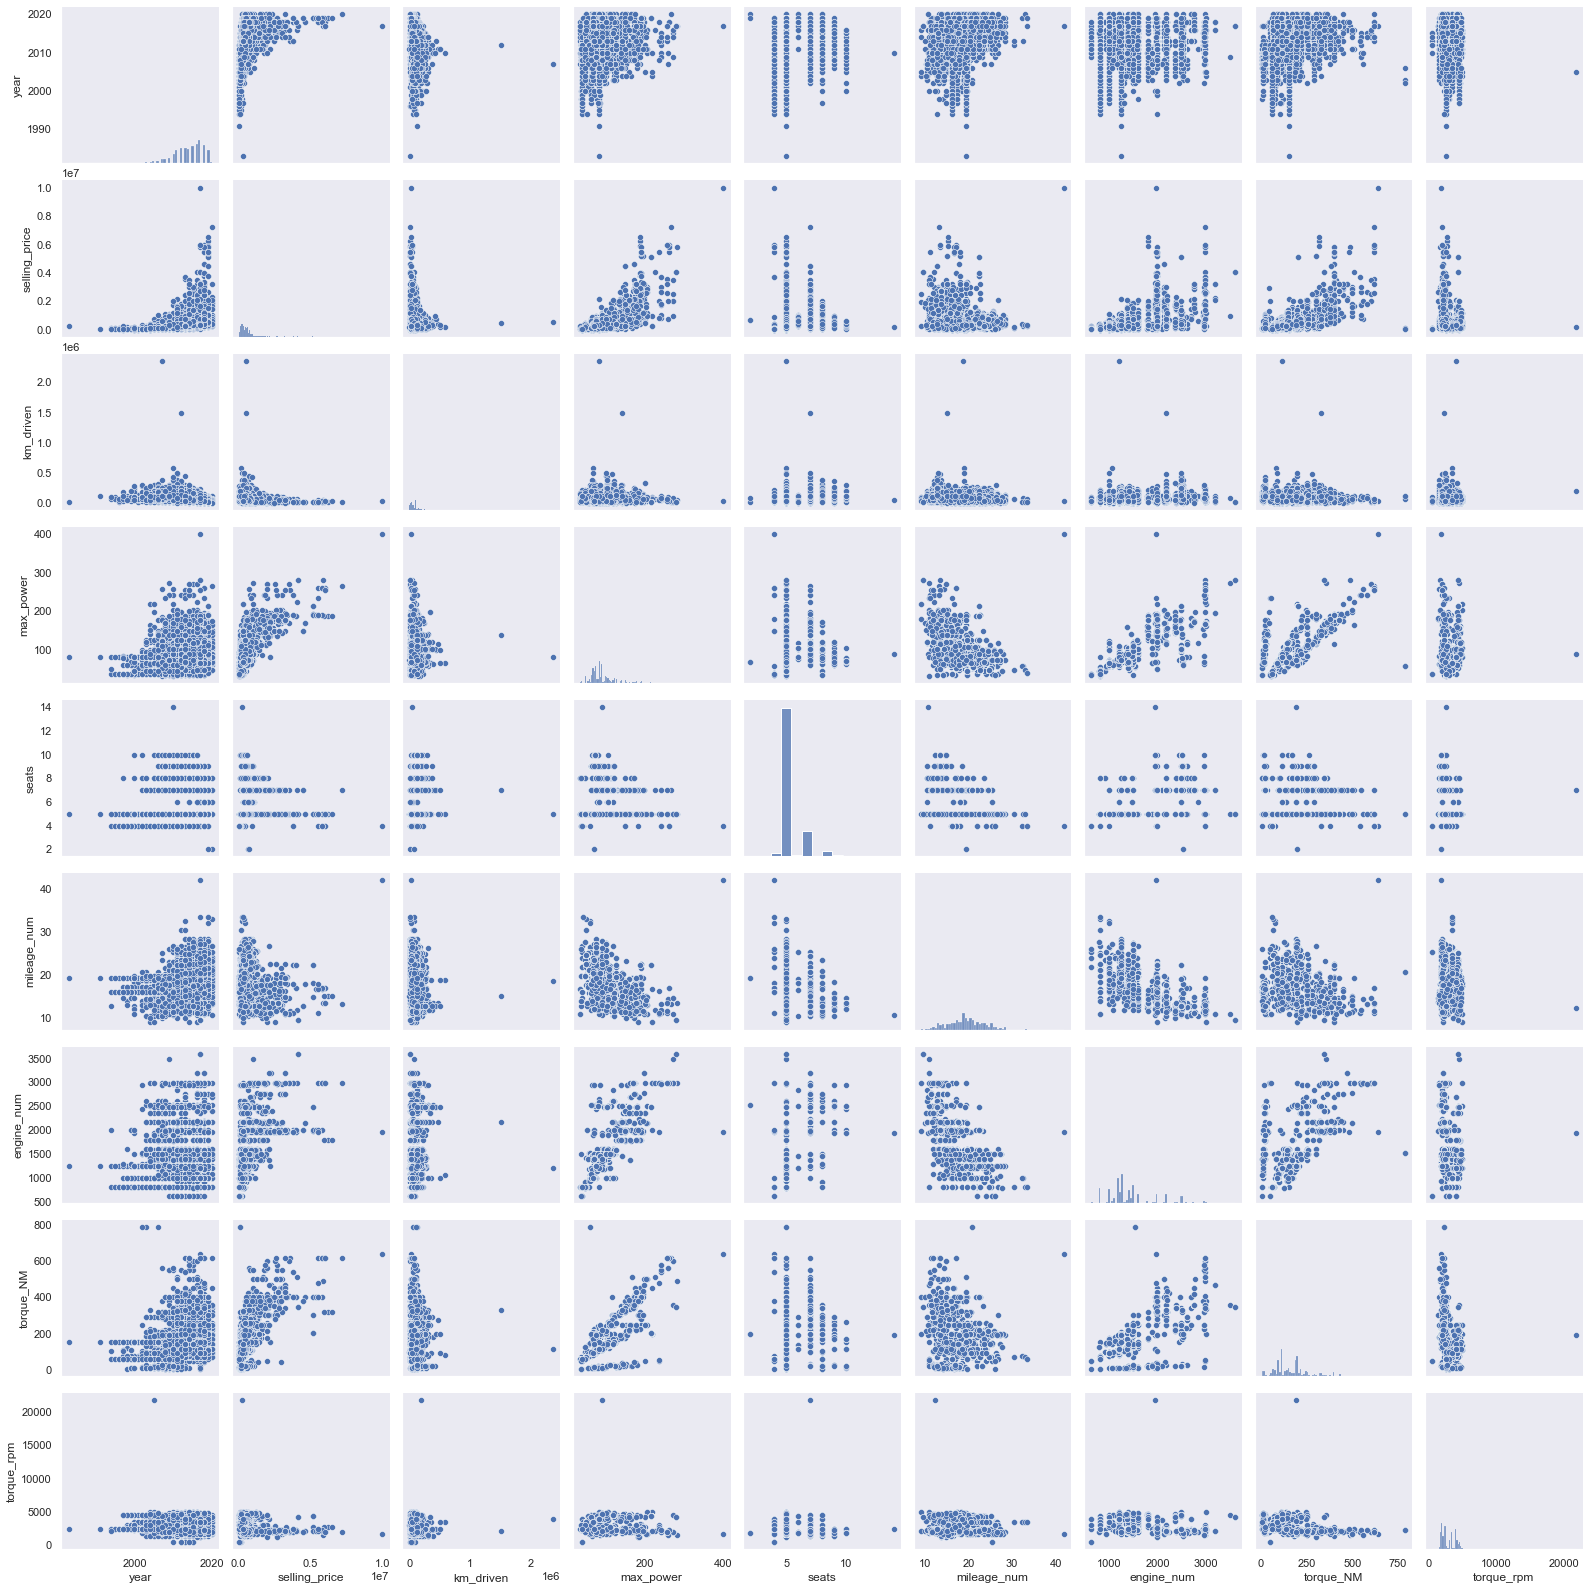

In [72]:
sns.pairplot(df1)

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

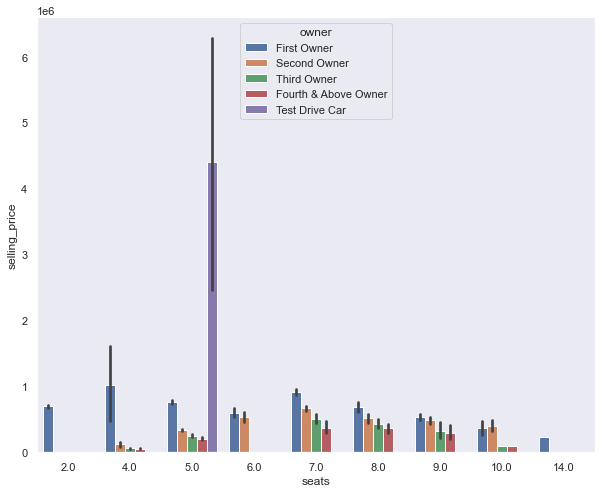

In [73]:
plt.subplots(figsize=(10,8))
sns.barplot(x='seats',y='selling_price',data=df1,hue='owner')

### Finding - Never but a 5 seated test drive car

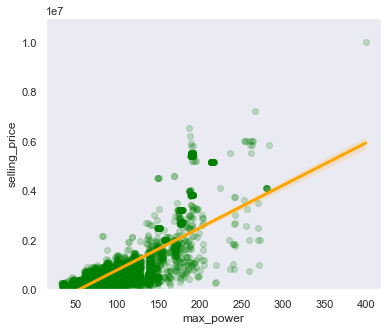

In [74]:
plt.subplots(figsize=(6,5))
plt.ylim(0,11000000)
sns.regplot(x='max_power',y='selling_price',data=df1,
           x_jitter=2,
           scatter_kws={'alpha':0.2,'color':'green'},
           truncate=True,
           line_kws={'color':'orange','lw':3});

### selling price is proportional to the power of the car

<AxesSubplot:xlabel='engine_num', ylabel='max_power'>

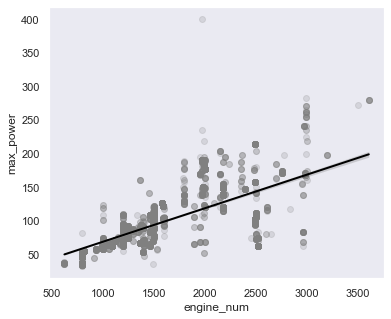

In [75]:
plt.subplots(figsize=(6,5))
sns.regplot(x='engine_num',y='max_power',data=df1,scatter_kws={'alpha':0.2,'color':'gray'},line_kws={'color':'black','lw':2})

<AxesSubplot:xlabel='torque_NM', ylabel='max_power'>

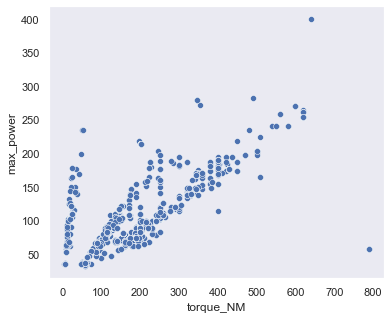

In [76]:
plt.subplots(figsize=(6,5))
sns.scatterplot(x='torque_NM',y='max_power',data=df1)

### The below plot tells how over the years the price of the three cars Maruti Swift Dzire VDI, Maruti Alto 800 LXI and Maruti Alto LXi changed

In [77]:
df1.name.value_counts()

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [78]:
df1.name.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [79]:
df2=df1.loc[(df1['name']=='Maruti Swift Dzire VDI') | (df1['name']=='Maruti Alto 800 LXI') | (df1['name']=='Maruti Alto LXi')]

<AxesSubplot:xlabel='year', ylabel='selling_price'>

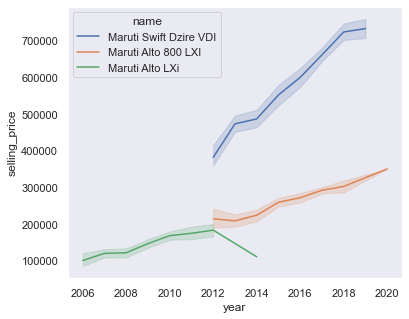

In [80]:
plt.subplots(figsize=(6,5))
sns.lineplot(x='year',y='selling_price',data=df2,hue='name')

In [82]:
df1=df1.drop('name',axis=1)

### the year feature is not used instead if i do some feature engineering on it by taking the current year 2021 and minus the year feature from it then that can be used to refer how old is the car which can also be understood by the ml model also

In [84]:
df1['no_year'] = 2021 - df1['year']
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,seats,mileage_num,engine_num,torque_NM,torque_rpm,no_year
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,5.0,23.4,1248.0,190.0,2000.0,7
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,5.0,21.1,1498.0,250.0,2000.0,7
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,78.00,5.0,17.7,1497.0,12.7,2700.0,15
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,90.00,5.0,23.0,1396.0,22.4,2250.0,11
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.20,5.0,16.1,1298.0,11.5,4500.0,14


### Now encoding the categorical features and droping the first categories so the dummy variable trap doesn't occur while our model will learn

In [85]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,seats,mileage_num,engine_num,torque_NM,torque_rpm
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,5.0,23.4,1248.0,190.0,2000.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,5.0,21.1,1498.0,250.0,2000.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,78.00,5.0,17.7,1497.0,12.7,2700.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,90.00,5.0,23.0,1396.0,22.4,2250.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.20,5.0,16.1,1298.0,11.5,4500.0


In [86]:
df1=df1.drop('year',axis=1)
final_df = pd.get_dummies(df1, drop_first=True)

In [87]:
final_df.head()

,selling_price,km_driven,max_power,seats,mileage_num,engine_num,torque_NM,torque_rpm,no_year,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,74.00,5.0,23.4,1248.0,190.0,2000.0,7,1,0,0,1,0,1,0,0,0,0
1,370000,120000,103.52,5.0,21.1,1498.0,250.0,2000.0,7,1,0,0,1,0,1,0,1,0,0
2,158000,140000,78.00,5.0,17.7,1497.0,12.7,2700.0,15,0,0,1,1,0,1,0,0,0,1
3,225000,127000,90.00,5.0,23.0,1396.0,22.4,2250.0,11,1,0,0,1,0,1,0,0,0,0
4,130000,120000,88.20,5.0,16.1,1298.0,11.5,4500.0,14,0,0,1,1,0,1,0,0,0,0


In [88]:
labels = final_df.selling_price

In [89]:
final_df = final_df.drop('selling_price',axis=1)
final_df

,km_driven,max_power,seats,mileage_num,engine_num,torque_NM,torque_rpm,no_year,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,74.00,5.0,23.4,1248.0,190.0,2000.0,7,1,0,0,1,0,1,0,0,0,0
1,120000,103.52,5.0,21.1,1498.0,250.0,2000.0,7,1,0,0,1,0,1,0,1,0,0
2,140000,78.00,5.0,17.7,1497.0,12.7,2700.0,15,0,0,1,1,0,1,0,0,0,1
3,127000,90.00,5.0,23.0,1396.0,22.4,2250.0,11,1,0,0,1,0,1,0,0,0,0
4,120000,88.20,5.0,16.1,1298.0,11.5,4500.0,14,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,110000,82.85,5.0,18.5,1197.0,113.7,4000.0,8,0,0,1,1,0,1,0,0,0,0
8124,119000,110.00,5.0,16.8,1493.0,24.0,2750.0,14,1,0,0,1,0,1,1,0,0,0
8125,120000,73.90,5.0,19.3,1248.0,190.0,2000.0,12,1,0,0,1,0,1,0,0,0,0
8126,25000,70.00,5.0,23.5,1396.0,140.0,2400.0,8,1,0,0,1,0,1,0,0,0,0


### performing feature importance using ExtraTreeRegressor of sklearn

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, labels, test_size=0.2, random_state=0)

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(final_df,labels)

ExtraTreesRegressor()

In [92]:
model.feature_importances_

array([5.09635014e-02, 2.23755990e-01, 9.34676059e-03, 2.03562289e-02,
       5.66600794e-02, 1.55202114e-01, 1.30661452e-02, 1.37516278e-01,
       1.76567718e-02, 5.17329483e-06, 8.39182316e-03, 1.82133371e-02,
       1.43332443e-03, 2.73376343e-01, 2.71431655e-04, 9.21540960e-03,
       3.71534968e-03, 8.53937658e-04])

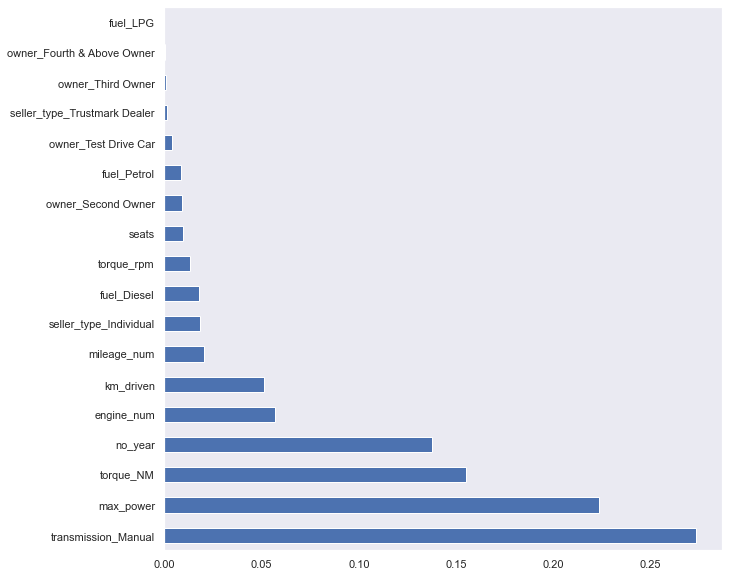

In [93]:
feat_importances = pd.Series(model.feature_importances_, index=final_df.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [100]:
X=final_df.iloc[:,1:]
y = final_df.iloc[:,1]

### performing train test split

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [102]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train.to_numpy(),y_train.to_numpy())

KNeighborsRegressor()

In [103]:
print('train score', knn.score(X_train.to_numpy(),y_train.to_numpy()))
print('test score', knn.score(X_test.to_numpy(), y_test.to_numpy()))

train score 0.988780631497694
test score 0.9591301364820273


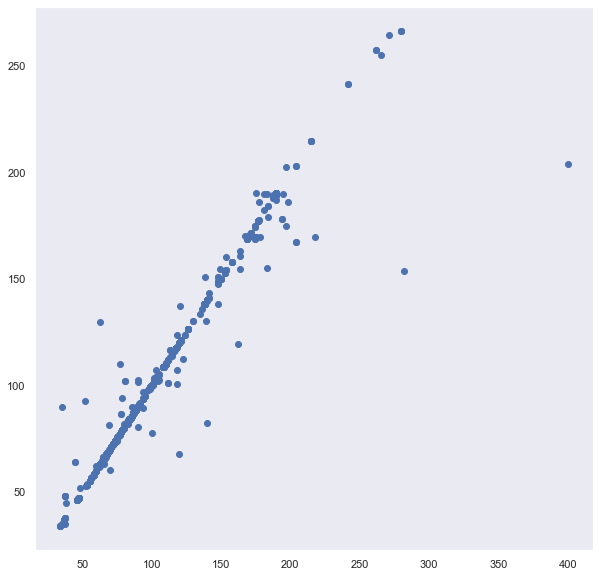

In [104]:
predictions = knn.predict(X_test.to_numpy())
plt.scatter(y_test,predictions)

### The above figure shows the predicted prices and the labels relation and we can see the relation is almost linear which means our model works

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('knn2.pkl', 'wb')

# dump information to that file
pickle.dump(knn, file)

### Dumping the model and we are ready to deploy it